In [ ]:
import pytesseract,re,os
from PIL import ImageOps, Image
from collections import defaultdict
from functools import reduce
import numpy as np
%config IPCompleter.greedy=True
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'



In [ ]:
img = Image.open("blandwh.png")


In [ ]:
num = 1
map = defaultdict(int)
indexes = defaultdict(list)
for i in range(1,img.height,100):
    for j in range(1, img.width,100):
        border = (1+i, 1+j, 99+i, 99+j)
        #Обрезка и сохранение фрагмента картинки
        ims = img.crop(border)
        ims.save("CroppedImages/"+str(num)+".png")
        #Распознавание текста на фрагмнте
        text = pytesseract.image_to_string(Image.open('CroppedImages/'+str(num)+'.png'))
        map[text] += 1
        indexes[text].append(num)
        num +=1 

In [157]:
fixedMap = defaultdict(int)
fixedIndexes = defaultdict(list)
for i in map.keys():
    newkey = (re.sub("[\n\(\)\,]",' ', i))
    if((re.search("[0-9]+",newkey)) and( not re.search("[R]+",newkey))):
        # Если на картинке распознались цифры, считаем, если сумма больше 150, то на картинке белый цвет, иначе черный
        sum = int(reduce(lambda x, y: int(x)+int(y), re.findall("[0-9]+",newkey)))
        if(sum>150):
            fixedMap["White_"]+=map[i]
            fixedIndexes["White_"]+=(indexes[i])
        else:
            fixedMap["Black_"]+=map[i]
            fixedIndexes["Black_"]+=(indexes[i])
    else:
        fixedMap[newkey] +=map[i]
        fixedIndexes[newkey]+=(indexes[i])


In [158]:
Black = ['Black', 'Blackest cell ever', 'Very black', 'Bie for black', 
         'Barkness', 'Darkness', 'Black_', 'B is for black', 
         'Not white', 'Blackeet cell ever', 'Blackest cellever',
         'Bis for black', 'Darknese', 
         '‘Blackest cell ever', 'very black', 
         'Notwhite', 'Bis for olack',  '®is for olack', 'eBlack', ]

In [159]:
for i in fixedMap.keys():
    to = ""
    if(i in Black):
        to = "Black/"
    else:
        to = "White/"
    for file in fixedIndexes[i]:
        try:
            os.rename("CroppedImages/"+str(file)+".png",to+str(file)+".png") 
        except WindowsError:
            o =2
        

In [160]:
a = [0]*1369

In [161]:
for i in range(1369):
    try:
        Image.open("Black/"+str(i+1)+".png")
        a[i] = 0
    except FileNotFoundError:
        a[i] = 255

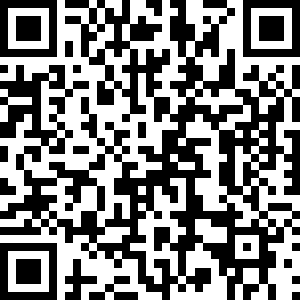

In [162]:
import numpy as np
import scipy.misc as smp
qrData = np.zeros( (37,37,3), dtype=np.uint8 )
for i in range(37):
    for j in range(37):
        qrData[j][i] = [a[i*37+j],a[i*37+j],a[i*37+j]]
qrImage = Image.fromarray(qrData)
qrImage = qrImage.resize((300,300))
qrImage.save("result.bmp")
qrImage